In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import metrics
import os, sys

In [6]:
# set random state

seed = 69

## Load Dataset

In [7]:
filepath = '../../../data/interim/data_op_02.csv'
data_op_2 = pd.read_csv(filepath)
data_op_2.head()

,unit,time_step,operational_setting_1,operational_setting_2,operational_setting_3,Sensor_0,Sensor_1,Sensor_2,Sensor_3,Sensor_4,...,Sensor_13,Sensor_14,Sensor_15,Sensor_16,Sensor_17,Sensor_18,Sensor_19,Sensor_20,Health_state,Operational_condition
3,1,4,20.0031,0.7005,0.0,491.19,607.03,1488.44,1249.18,9.35,...,8052.30,9.2231,0.02,364,2324,100.0,24.42,14.7832,1,2
5,1,6,20.0032,0.7017,0.0,491.19,607.37,1480.46,1258.90,9.35,...,8053.17,9.2276,0.02,364,2324,100.0,24.44,14.7019,1,2
22,1,23,20.0025,0.7011,0.0,491.19,607.10,1482.68,1252.00,9.35,...,8050.94,9.2149,0.02,366,2324,100.0,24.58,14.6688,1,2
30,1,31,20.0045,0.7006,0.0,491.19,607.38,1483.93,1256.88,9.35,...,8059.58,9.2111,0.02,366,2324,100.0,24.48,14.7826,2,2
44,1,45,20.0062,0.7000,0.0,491.19,607.58,1477.33,1250.58,9.35,...,8054.67,9.2541,0.02,364,2324,100.0,24.60,14.7028,2,2


Then, drop the labels

In [8]:
labels_op_02 =  np.array(data_op_2['Health_state'])

# Pipeline

In [9]:
from phm08ds.features.feature_selection import SelectSensors

tf_select_sensors = SelectSensors(kind='custom', sensors=[1,2,3,6,8,10,11,12,13,14,19,20])
data_op_2 = tf_select_sensors.fit_transform(data_op_2)
data_op_2.head()

,unit,time_step,operational_setting_1,operational_setting_2,operational_setting_3,Sensor_1,Sensor_2,Sensor_3,Sensor_6,Sensor_8,Sensor_10,Sensor_11,Sensor_12,Sensor_13,Sensor_14,Sensor_19,Sensor_20,Operational_condition
3,1,4,20.0031,0.7005,0.0,607.03,1488.44,1249.18,334.82,8721.53,44.26,314.84,2388.07,8052.30,9.2231,24.42,14.7832,2
5,1,6,20.0032,0.7017,0.0,607.37,1480.46,1258.90,334.51,8711.44,44.40,315.36,2388.05,8053.17,9.2276,24.44,14.7019,2
22,1,23,20.0025,0.7011,0.0,607.10,1482.68,1252.00,334.49,8716.75,44.44,314.87,2388.10,8050.94,9.2149,24.58,14.6688,2
30,1,31,20.0045,0.7006,0.0,607.38,1483.93,1256.88,334.30,8715.50,44.33,314.94,2388.12,8059.58,9.2111,24.48,14.7826,2
44,1,45,20.0062,0.7000,0.0,607.58,1477.33,1250.58,334.80,8715.69,44.49,315.06,2388.09,8054.67,9.2541,24.60,14.7028,2


In [10]:
from phm08ds.features.feature_selection import RemoveInfo

tf_remove_info = RemoveInfo()

data_with_features = tf_remove_info.fit_transform(data_op_2)
data_with_features.head()

,Sensor_1,Sensor_2,Sensor_3,Sensor_6,Sensor_8,Sensor_10,Sensor_11,Sensor_12,Sensor_13,Sensor_14,Sensor_19,Sensor_20
3,607.03,1488.44,1249.18,334.82,8721.53,44.26,314.84,2388.07,8052.30,9.2231,24.42,14.7832
5,607.37,1480.46,1258.90,334.51,8711.44,44.40,315.36,2388.05,8053.17,9.2276,24.44,14.7019
22,607.10,1482.68,1252.00,334.49,8716.75,44.44,314.87,2388.10,8050.94,9.2149,24.58,14.6688
30,607.38,1483.93,1256.88,334.30,8715.50,44.33,314.94,2388.12,8059.58,9.2111,24.48,14.7826
44,607.58,1477.33,1250.58,334.80,8715.69,44.49,315.06,2388.09,8054.67,9.2541,24.60,14.7028


In [11]:
data_with_features.head()

,Sensor_1,Sensor_2,Sensor_3,Sensor_6,Sensor_8,Sensor_10,Sensor_11,Sensor_12,Sensor_13,Sensor_14,Sensor_19,Sensor_20
3,607.03,1488.44,1249.18,334.82,8721.53,44.26,314.84,2388.07,8052.30,9.2231,24.42,14.7832
5,607.37,1480.46,1258.90,334.51,8711.44,44.40,315.36,2388.05,8053.17,9.2276,24.44,14.7019
22,607.10,1482.68,1252.00,334.49,8716.75,44.44,314.87,2388.10,8050.94,9.2149,24.58,14.6688
30,607.38,1483.93,1256.88,334.30,8715.50,44.33,314.94,2388.12,8059.58,9.2111,24.48,14.7826
44,607.58,1477.33,1250.58,334.80,8715.69,44.49,315.06,2388.09,8054.67,9.2541,24.60,14.7028


In [12]:
from sklearn.preprocessing import StandardScaler

tf_std_scaller = preprocessing.StandardScaler()
data_with_features_std = tf_std_scaller.fit_transform(data_with_features)
data_with_features_std

array([[-1.21269466,  0.42240019, -0.57734709, ..., -0.31420781,
        -0.20215967,  1.41169596],
       [-0.48655592, -0.9665274 ,  0.66883265, ..., -0.19593168,
        -0.05207764,  0.39575503],
       [-1.0631955 , -0.58013401, -0.21580111, ..., -0.5297332 ,
         0.99849653, -0.01786914],
       ...,
       [ 0.00465558,  0.90452168,  0.80857915, ...,  0.99734305,
        -1.47785687, -0.28778702],
       [ 1.11522072,  0.66781221, -0.15810761, ...,  1.30486099,
        -0.95256979, -0.97632756],
       [ 1.26471987,  1.2474023 ,  1.29064045, ...,  0.89483707,
         0.92345551, -0.32027714]])

In [14]:
X = data_with_features_std
y = labels_op_02

In [15]:
from sklearn.pipeline import Pipeline

data_preprocessing = Pipeline([('select_sensors', tf_select_sensors),
                               ('remove_info', tf_remove_info),
                               ('std_scaler', tf_std_scaller)
                              ])

In [16]:
from sklearn.externals import joblib

joblib.dump(data_preprocessing, '../../../models/pipeline/select-sensorNavar_remove-info_std-scaller-OP2.pkl')

['../../../models/pipeline/select-sensorNavar_remove-info_std-scaller-OP2.pkl']

# Classification steps

## Load classifiers

In [17]:
classifiers = joblib.load('models/classifiers.pkl')

In [18]:
mlp_clf = classifiers['MLP']

In [19]:
mlp_clf.set_params()

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=17, learning_rate='adaptive',
       learning_rate_init=0.0005, max_iter=1300, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

## Load model selection object

In [20]:
from sklearn.model_selection import StratifiedKFold

kf = StratifiedKFold(n_splits = 2, random_state=69, shuffle=True)

for train_index, test_index in kf.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

In [21]:
mlp_clf.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=17, learning_rate='adaptive',
       learning_rate_init=0.0005, max_iter=1300, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [22]:
y_hat = mlp_clf.predict(X_test)
y_hat_proba = mlp_clf.predict_proba(X_test)

### Performance acessment

In [23]:
from sklearn import metrics

In [24]:
conf_mat = metrics.classification.confusion_matrix(y_test, y_hat)
acc = metrics.classification.accuracy_score(y_test, y_hat)
acc

0.6567208271787297

In [25]:
from phm08ds.utils import metrics as met

In [26]:
met.conf_mat_percentage(conf_mat)

array([[10, 28, 61,  0],
       [ 4, 26, 68,  0],
       [ 1,  9, 83,  6],
       [ 0,  0, 16, 83]])

## Filter by the mode

In [27]:
from scipy import stats

# Create a function called "chunks" with two arguments, l and n:
def chunks(l, n):
    # For item i in a range that is a length of l,
    for i in range(0, len(l), n):
        # Create an index range for l of n items:
        yield l[i:i+n]

def predict_mode(y_hat, t):
    y_hat_mode = []
    for k in list(chunks(y_hat, t)):
        result_mode = stats.mode(k)
        y_hat_mode.append(result_mode.mode)
    
    return np.array(y_hat_mode)

In [28]:
t = 3

y_test_mode = predict_mode(y_test, t)
y_hat_mode = predict_mode(y_hat, t)

print('acc: {}'.format(metrics.accuracy_score(y_test_mode, y_hat_mode)))

met.conf_mat_percentage(metrics.confusion_matrix(y_test_mode, y_hat_mode))

acc: 0.6660761736049602


array([[10, 27, 61,  0],
       [ 5, 23, 71,  0],
       [ 1,  5, 87,  5],
       [ 0,  0, 15, 83]])

In [29]:
acc_with_mode = []

for t in np.arange(1, 125):
    y_test_mode = predict_mode(y_test, t)
    y_hat_mode = predict_mode(y_hat, t)
    
    
    acc_with_mode.append(metrics.accuracy_score(y_test_mode, y_hat_mode))
    
acc_with_mode = np.array(acc_with_mode)

## Generate figure

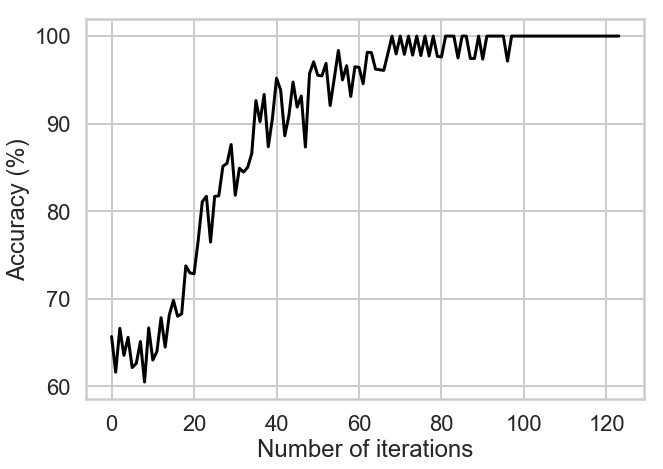

In [31]:
import seaborn as sns

sns.set_style('whitegrid')
sns.set_context("poster")

plt.figure(figsize=(10,7))
# ax = plt.subplots()
plt.plot(acc_with_mode*100, 'k')
plt.xlabel('Number of iterations')
plt.ylabel('Accuracy (%)')

# fig.savefig('myimage.svg', format='eps', dpi=1200, bbox_inches='tight')
plt.savefig('./figures/predictions_by_mode-OC2.eps', format='eps', dpi=300, bbox_inches='tight')
plt.savefig('./figures/predictions_by_mode-OC2.png', format='png', dpi=300, bbox_inches='tight')